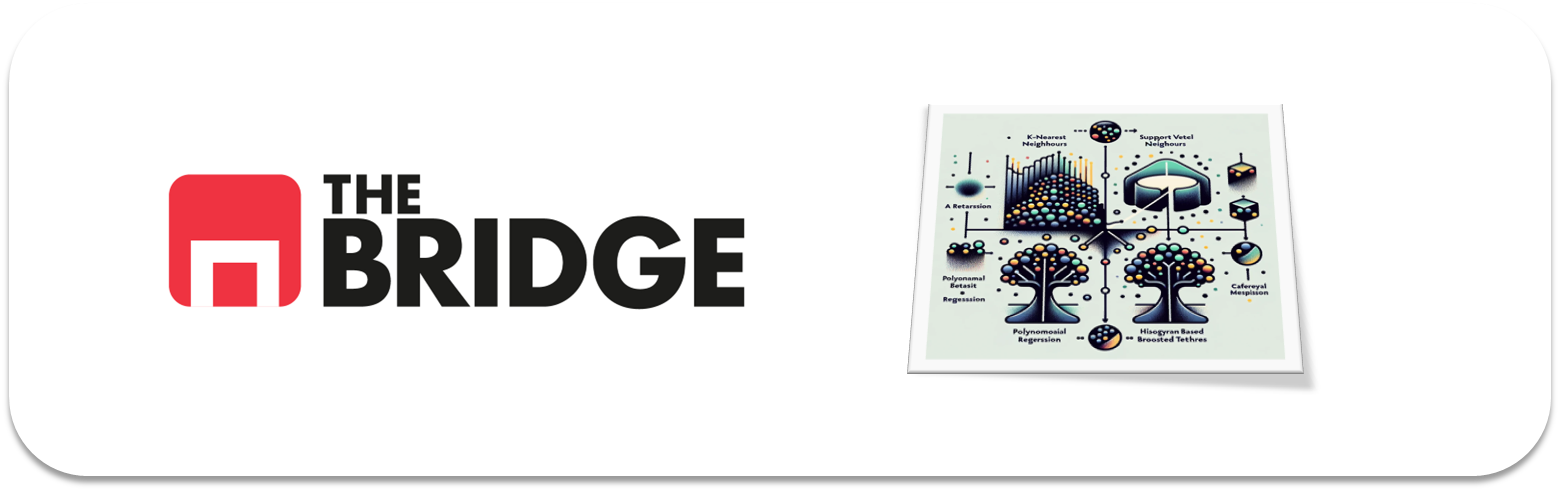

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [134]:
import warnings
warnings.filterwarnings("ignore")
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from toolbox_ML import *


### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [63]:
df = pd.read_csv("./data/wines_dataset.csv", sep = "|")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [31]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white


In [64]:
# Obtén los tipos de datos de cada columna
tipos_de_datos = df.dtypes

# Inicializa listas para almacenar nombres de columnas numéricas y categóricas
columnas_numericas = []
columnas_categoricas = []

# Itera sobre cada columna y clasifícala como numérica o categórica
for columna, tipo in tipos_de_datos.items():
    if pd.api.types.is_numeric_dtype(tipo):
        columnas_numericas.append(columna)
    else:
        columnas_categoricas.append(columna)

# Muestra las columnas numéricas y categóricas
print("Columnas numéricas:")
print(columnas_numericas)
print("\nColumnas categóricas:")
print(columnas_categoricas)

Columnas numéricas:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Columnas categóricas:
['class']


In [65]:
target_clasif ='quality'

In [66]:
target_reg ='alcohol'

In [67]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

##### Mini eda

Target

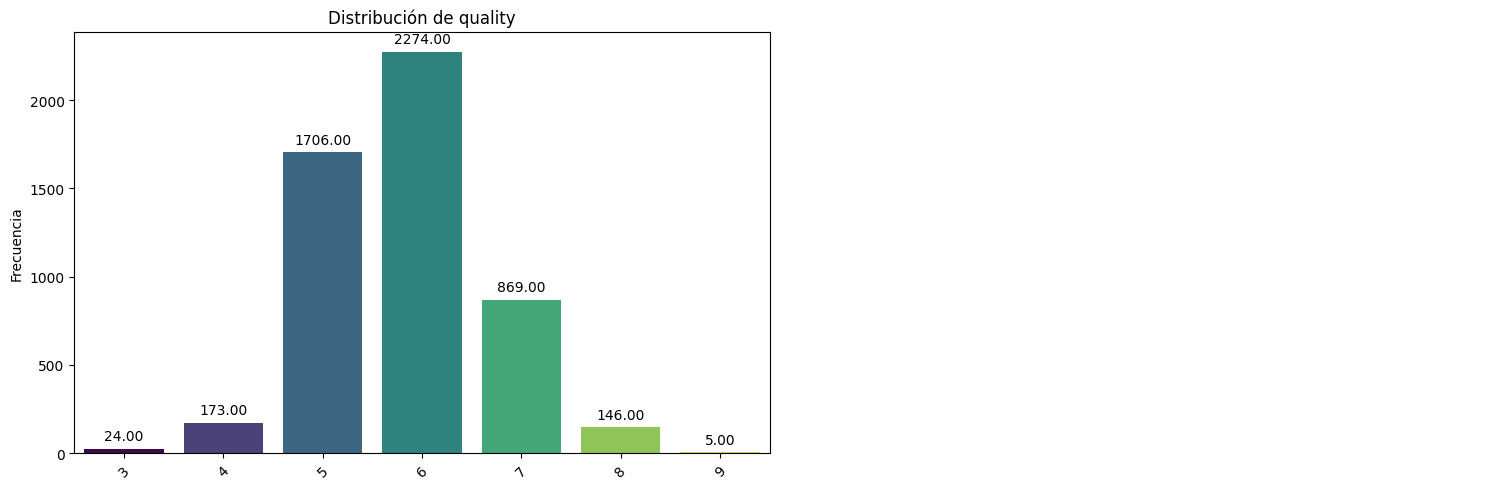

In [36]:
bt.pinta_distribucion_categoricas(train_set,[target_clasif], mostrar_valores= True)

Categóricas

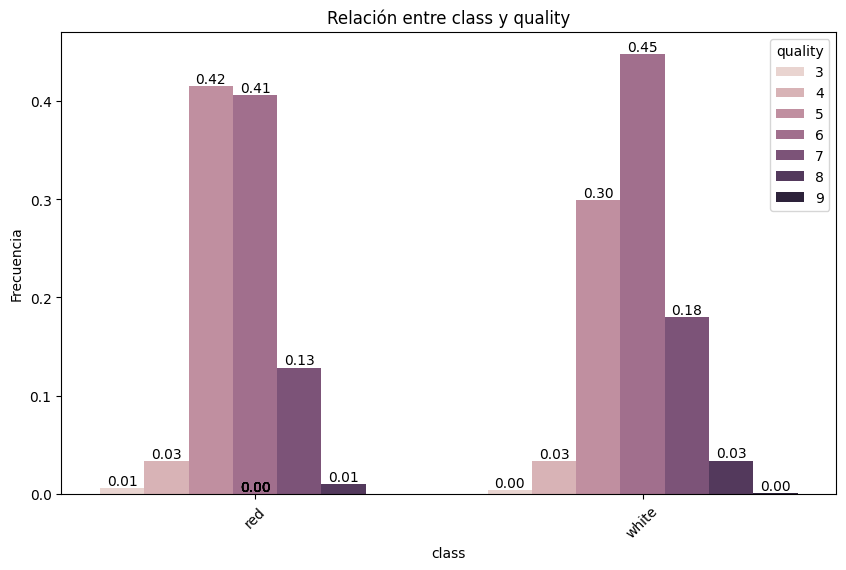

In [37]:
bt.plot_categorical_relationship_fin(train_set, "class", target_clasif, show_values= True, relative_freq= True)


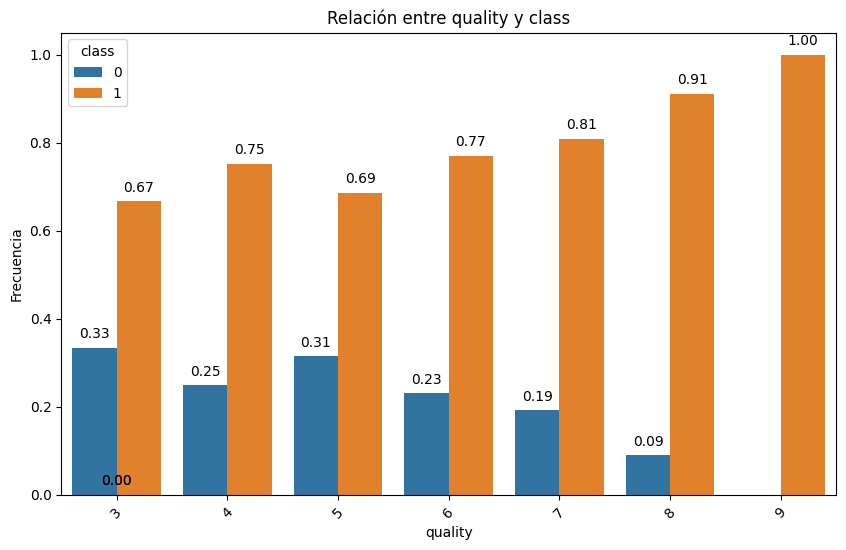

In [133]:
bt.plot_categorical_relationship_fin(train_set, target_clasif,"class",  show_values= True, relative_freq= True, size_group=10)


In [68]:
features_cat_clf = ["class"]

Numéricas

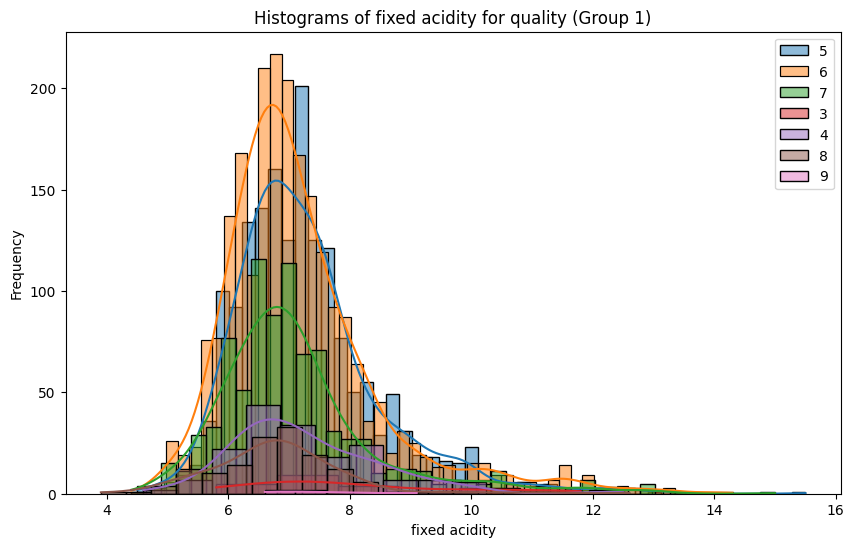

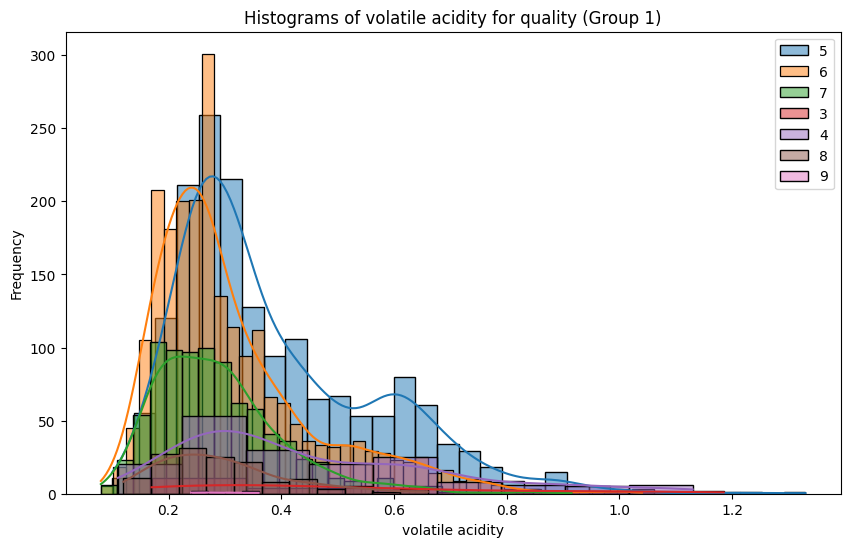

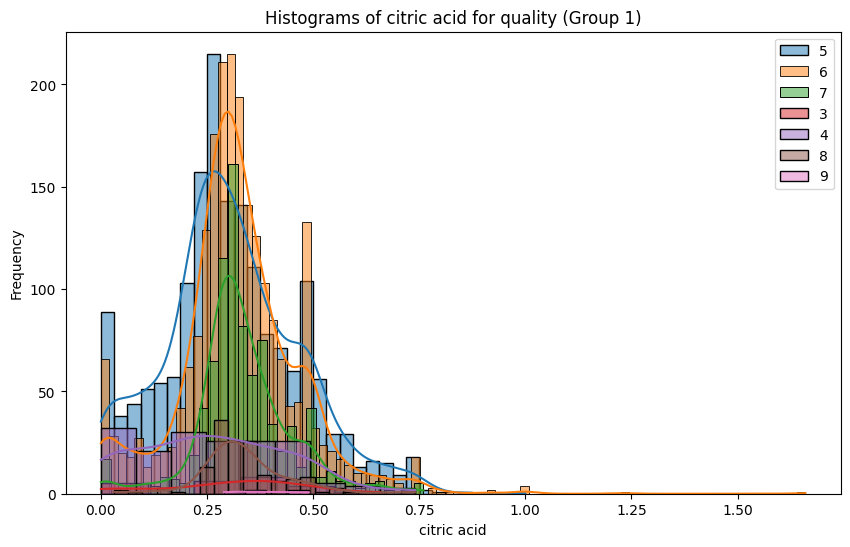

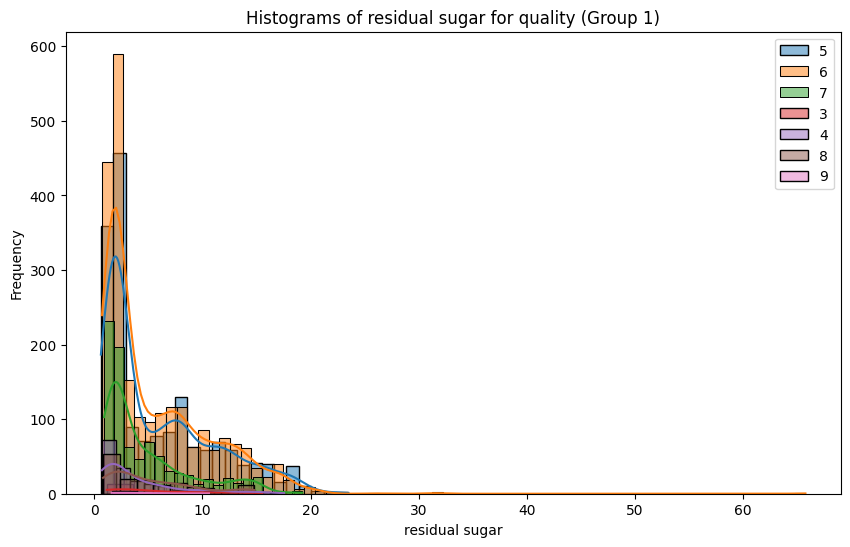

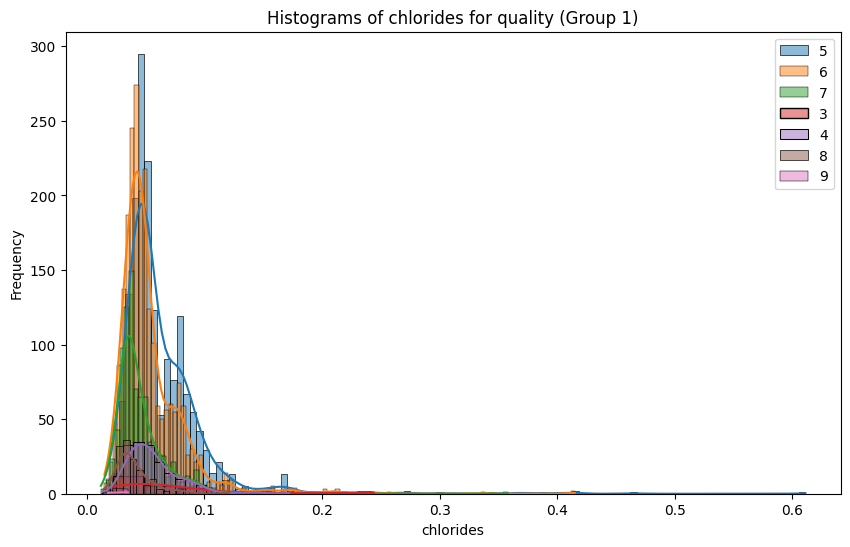

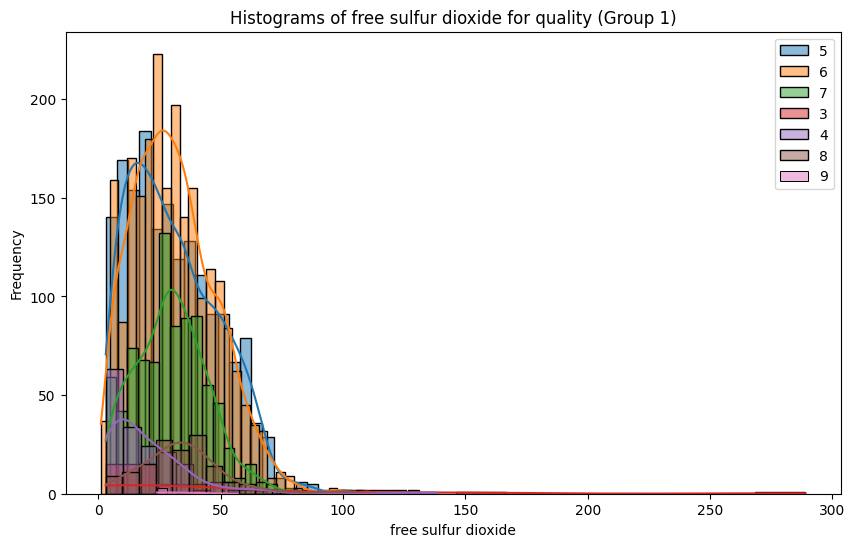

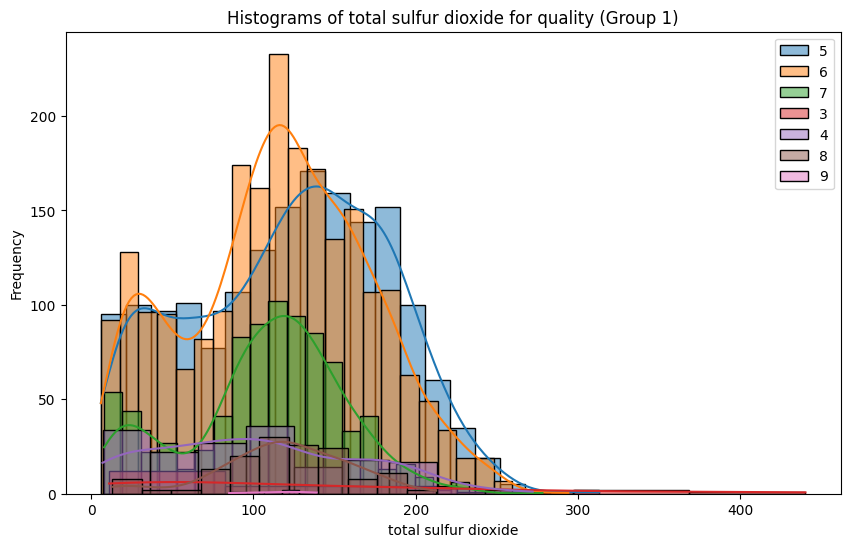

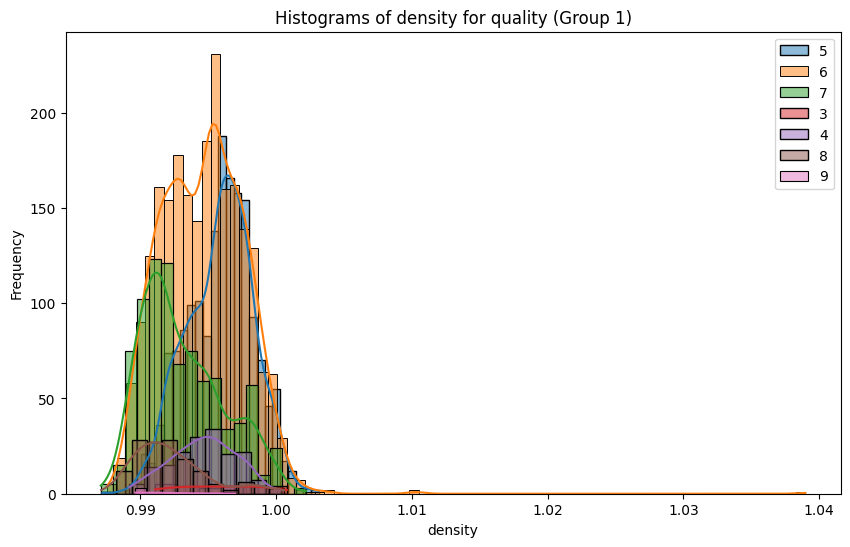

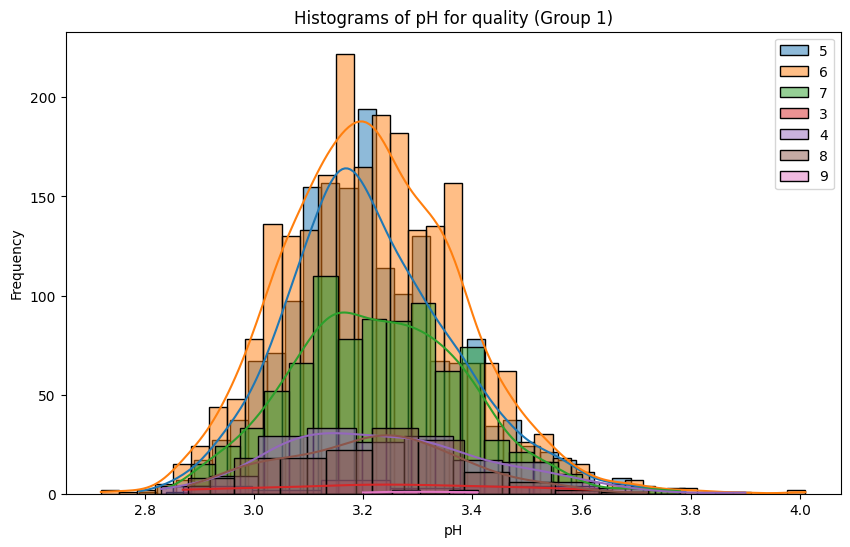

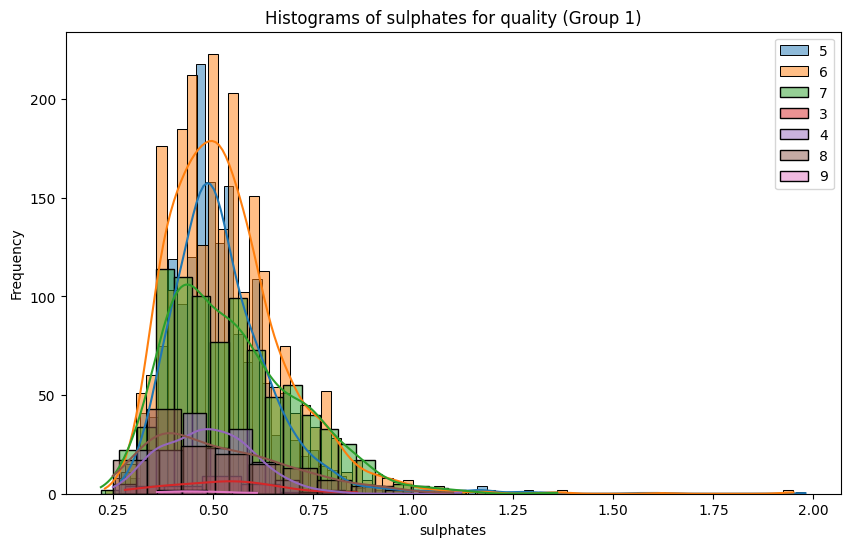

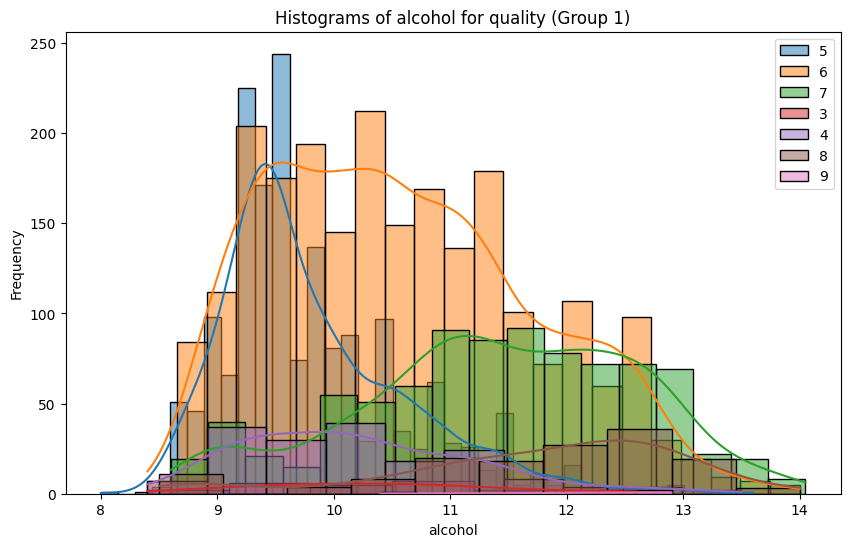

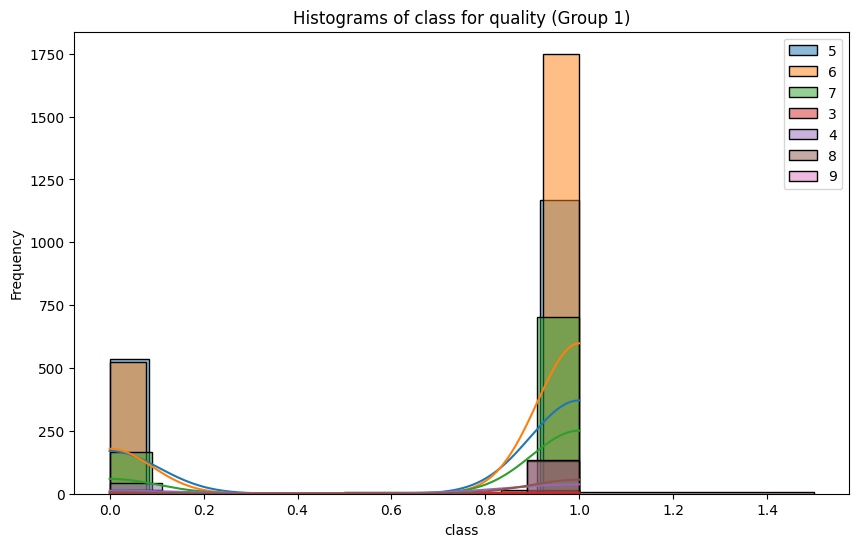

In [40]:
features = [col for col in train_set.columns if col != target_clasif]
for col in features:
    bt.plot_grouped_histograms(train_set, cat_col= target_clasif, num_col= col, group_size= 7)

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'class'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

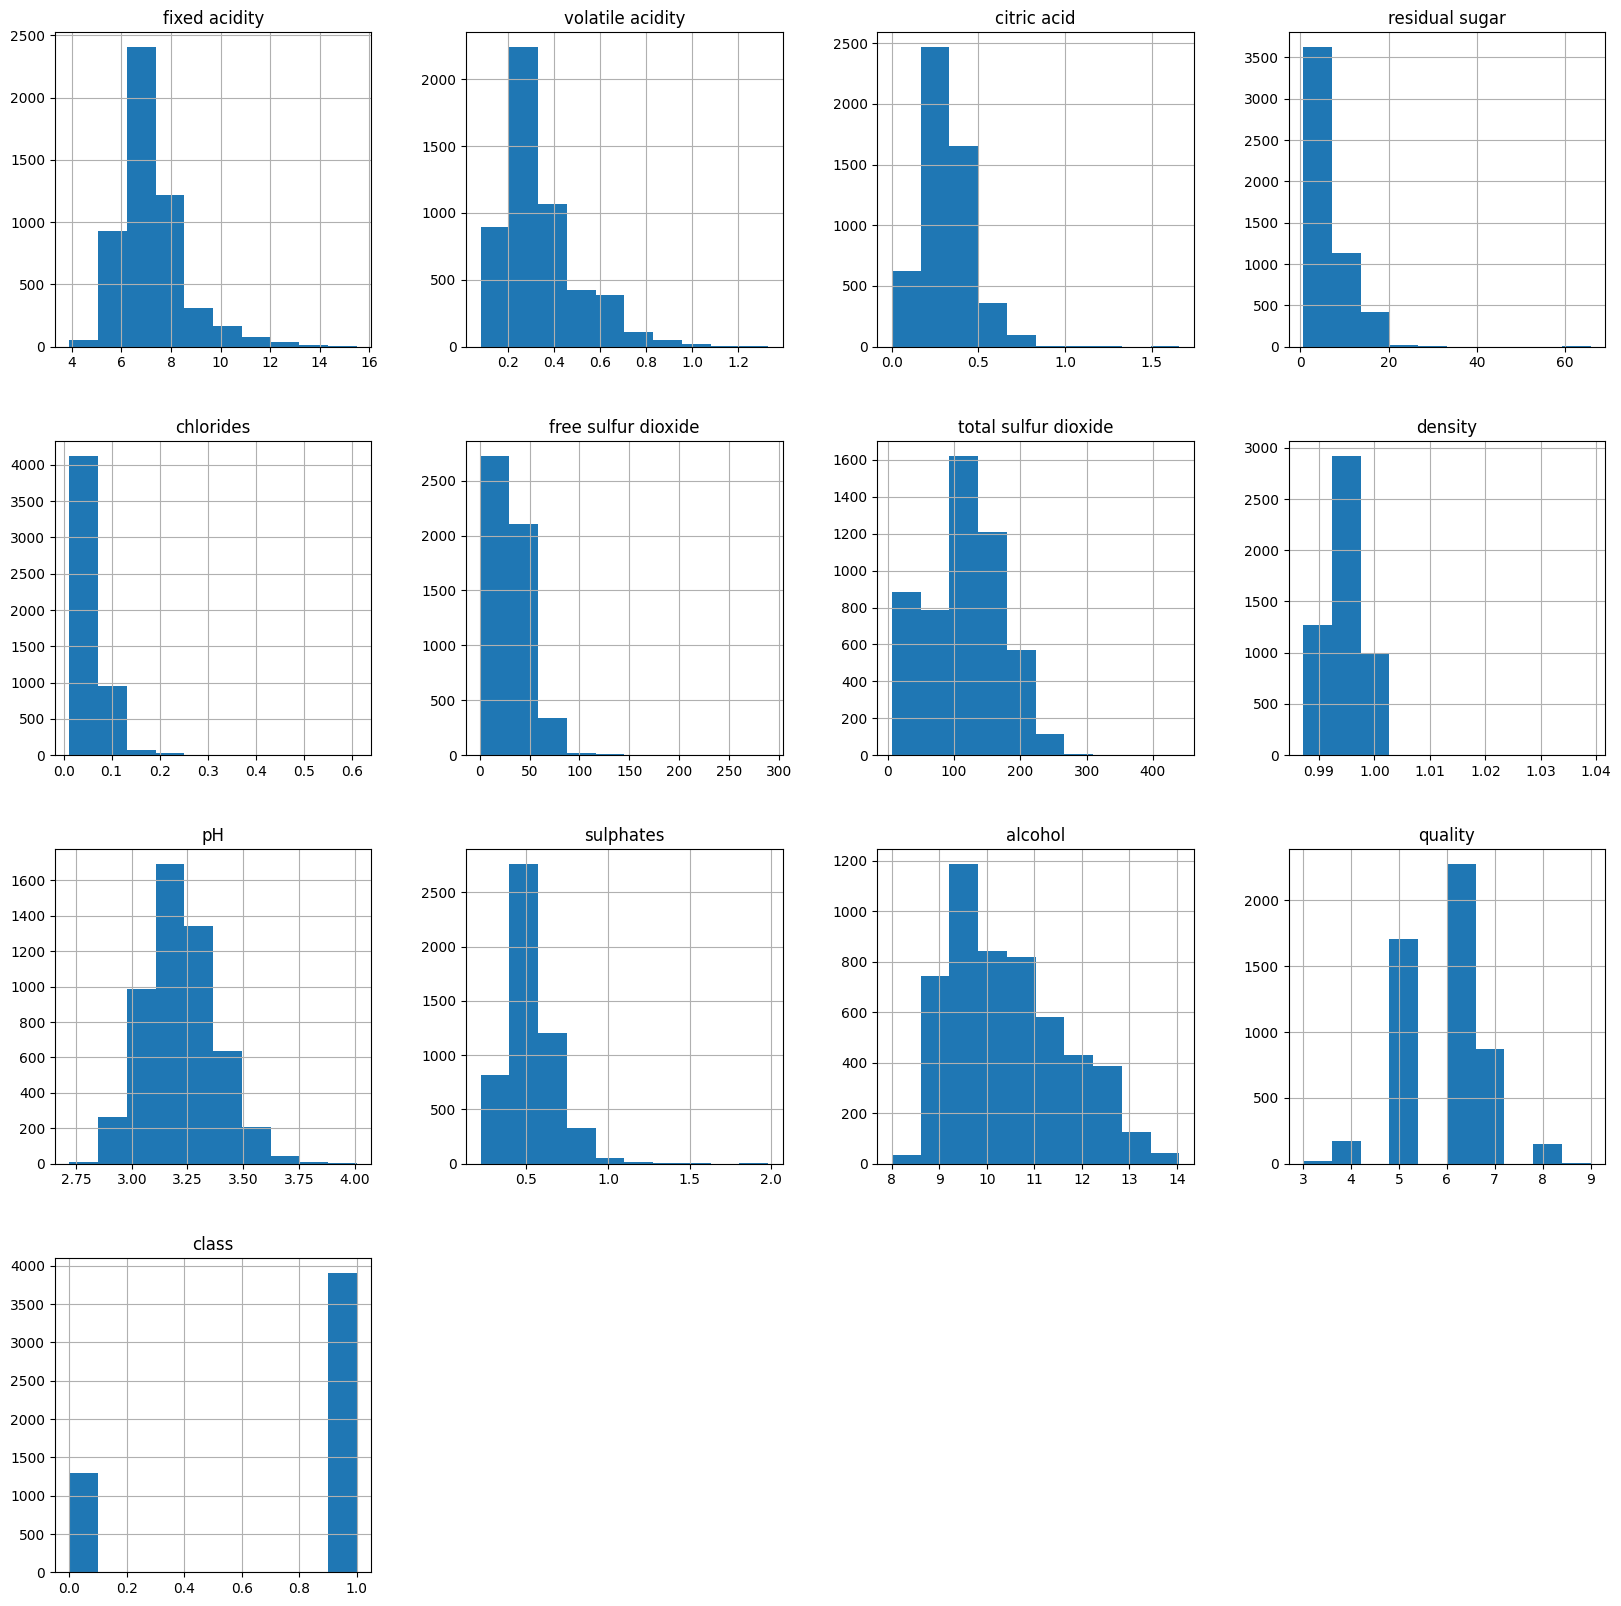

In [41]:
train_set.hist(figsize = (20,20))

In [135]:
get_features_cat_regression(df, target_clasif, pvalue=0.05)


['class']

In [137]:
get_features_num_regression(df, target_clasif, 0.05)

Exception ignored in sys.unraisablehook: <built-in function unraisablehook>
Traceback (most recent call last):
  File "c:\Users\mfm-8\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\iostream.py", line 664, in write
    parent = self.parent_header
  File "c:\Users\mfm-8\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\iostream.py", line 509, in parent_header
    return self._parent_header.get()
KeyboardInterrupt: 


In [69]:
features_num_clf_1 = ["volatile acidity","citric acid","chlorides","free sulfur dioxide","total sulfur dioxide", "density","pH","sulphates","alcohol"]
features_num_clf_2 = ["fixed acidity","residual sugar"]

Class pasa a 0,1


In [70]:
train_set["class"] = (train_set["class"] == "white").astype(int) 
test_set["class"] = (test_set["class"] == "white").astype(int) 

train_set.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
1916,7.9,0.18,0.40,2.2,0.049,38.0,67.0,0.9960,3.33,0.93,11.3,5,0
947,7.1,0.18,0.74,15.6,0.044,44.0,176.0,0.9996,3.38,0.67,9.0,6,1


Escalado

In [71]:
train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

In [72]:
features_to_transform = ["residual sugar", "chlorides","free sulfur dioxide", "total sulfur dioxide"]

In [73]:
for col in features_to_transform:
    desplaza = 0 
    if train_set_scaled[col].min() <= 0:
        desplaza = int(abs(train_set_scaled[col].min())) + 1
    train_set_scaled[col] = np.log(train_set_scaled[col] + desplaza)
    test_set_scaled[col] = np.log(test_set_scaled[col] + desplaza)

In [74]:
scaler = StandardScaler()

train_set_scaled_clf = train_set_scaled.copy()
test_set_scaled_clf = test_set_scaled.copy()

train_set_scaled_clf["alcohol"] = scaler.fit_transform(train_set_scaled_clf[["alcohol"]])
test_set_scaled_clf["alcohol"] = scaler.transform(test_set_scaled_clf[["alcohol"]])

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'class'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

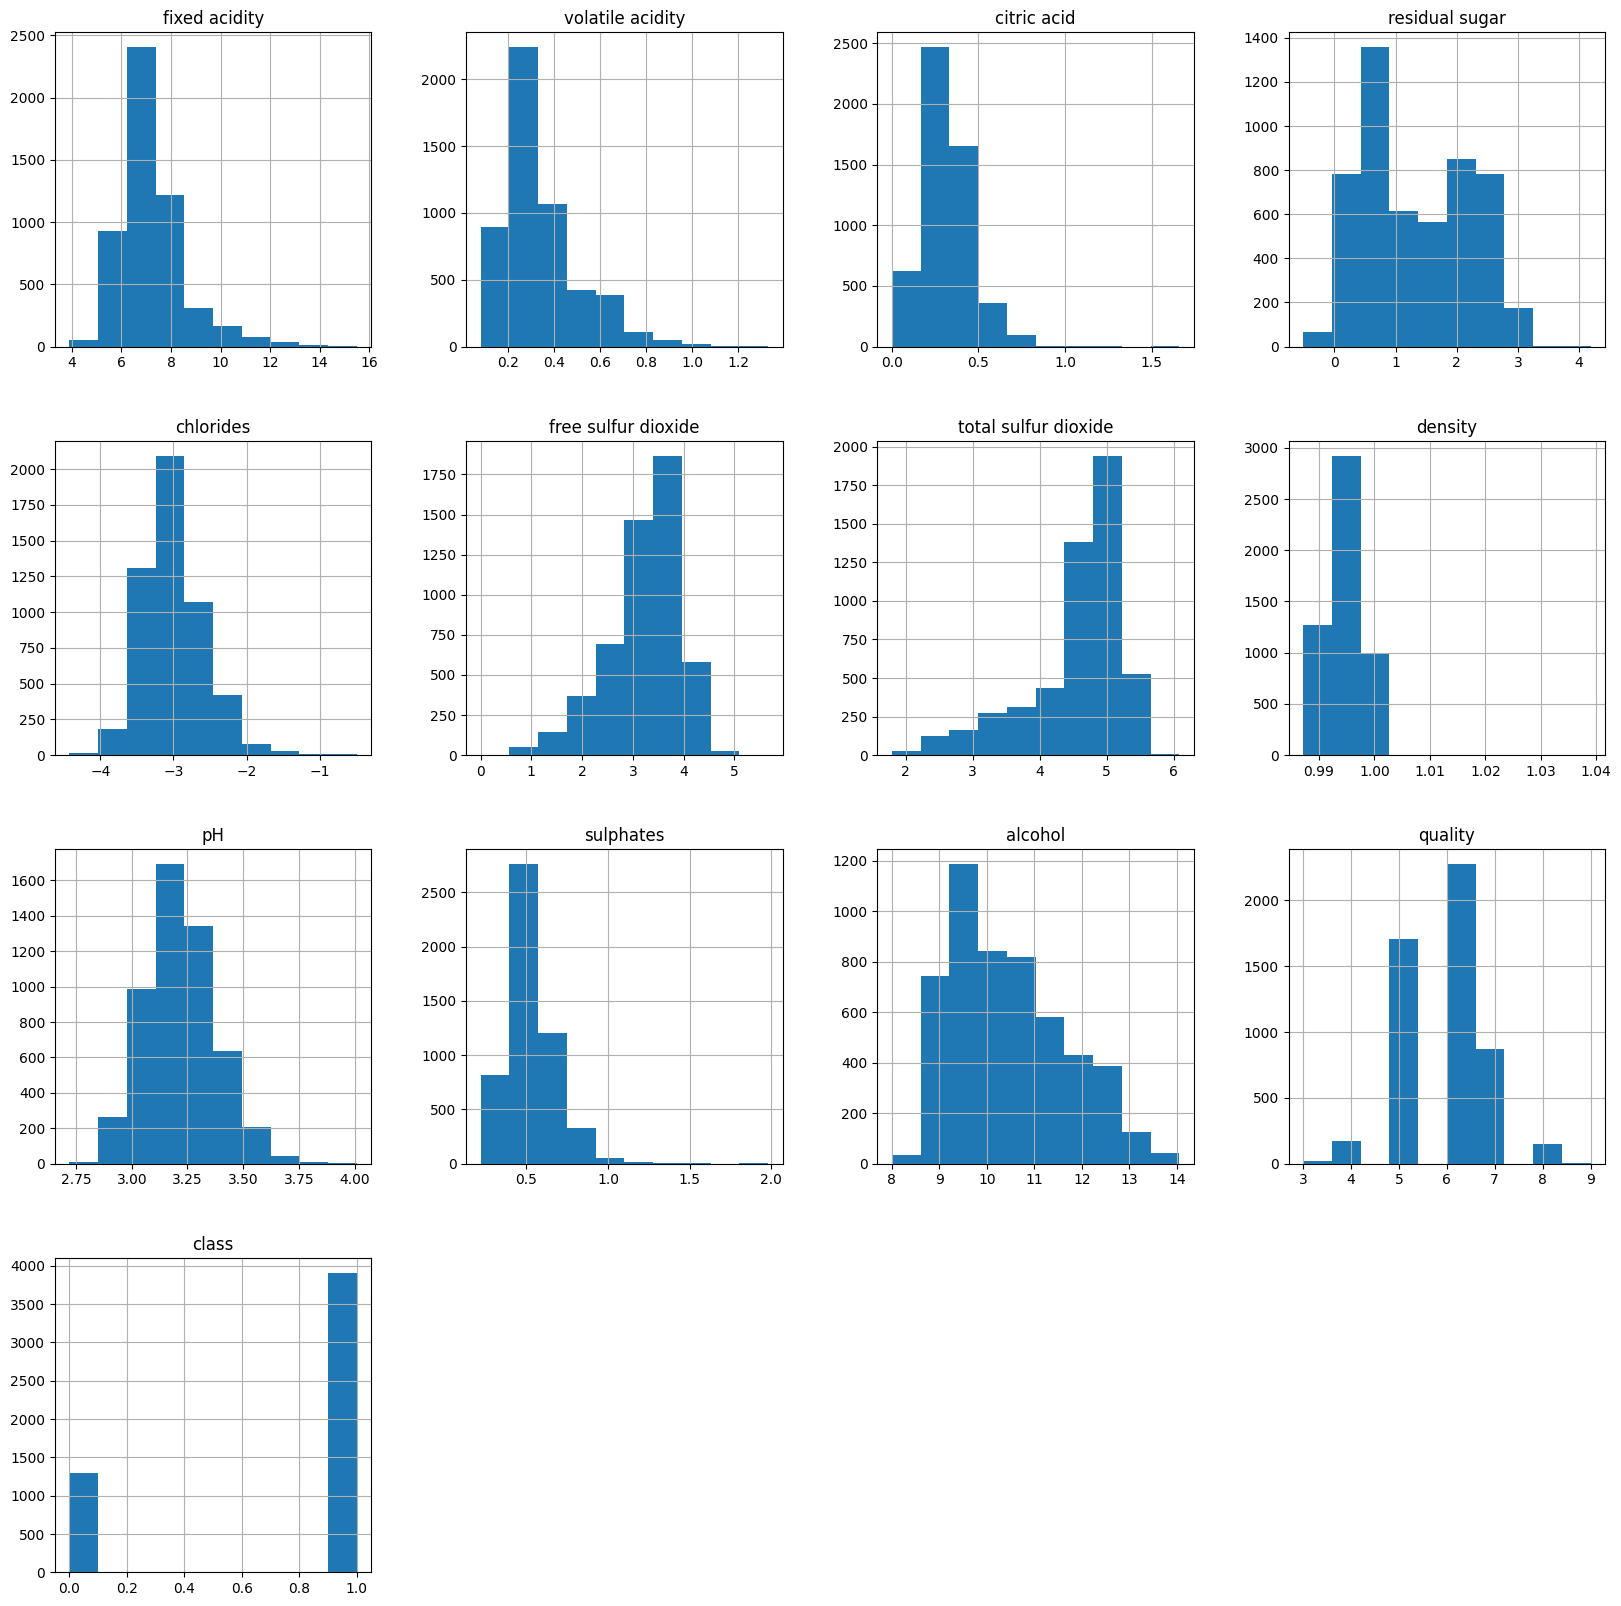

In [75]:
train_set_scaled.hist(figsize = (20,20))

In [46]:
# Calcular la matriz de correlación
matriz_correlacion = train_set_scaled[columnas_numericas].corr()
matriz_correlacion


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.214472,0.326562,-0.099630,0.372971,-0.359768,-0.405929,0.453447,-0.249151,0.300749,-0.091964,-0.071698
volatile acidity,0.214472,1.000000,-0.386228,-0.156105,0.446888,-0.390304,-0.466497,0.271523,0.272458,0.225499,-0.036041,-0.255368
citric acid,0.326562,-0.386228,1.000000,0.119344,-0.031489,0.105411,0.172385,0.091340,-0.331794,0.044118,-0.005690,0.096020
residual sugar,-0.099630,-0.156105,0.119344,1.000000,-0.106979,0.389690,0.415140,0.509033,-0.244310,-0.172221,-0.309084,-0.016315
chlorides,0.372971,0.446888,-0.031489,-0.106979,1.000000,-0.291935,-0.398116,0.515066,0.136764,0.380749,-0.369663,-0.264120
free sulfur dioxide,-0.359768,-0.390304,0.105411,0.389690,-0.291935,1.000000,0.786764,-0.049344,-0.149894,-0.230239,-0.148186,0.097296
total sulfur dioxide,-0.405929,-0.466497,0.172385,0.415140,-0.398116,0.786764,1.000000,-0.101665,-0.254473,-0.328219,-0.189356,0.000851
density,0.453447,0.271523,0.091340,0.509033,0.515066,-0.049344,-0.101665,1.000000,0.018402,0.260861,-0.682345,-0.305107
pH,-0.249151,0.272458,-0.331794,-0.244310,0.136764,-0.149894,-0.254473,0.018402,1.000000,0.204925,0.116497,0.011918
sulphates,0.300749,0.225499,0.044118,-0.172221,0.380749,-0.230239,-0.328219,0.260861,0.204925,1.000000,0.000412,0.052398


Creación de parejas train y test

In [76]:
train_set_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5197 entries, 1916 to 860
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5197 non-null   float64
 1   volatile acidity      5197 non-null   float64
 2   citric acid           5197 non-null   float64
 3   residual sugar        5197 non-null   float64
 4   chlorides             5197 non-null   float64
 5   free sulfur dioxide   5197 non-null   float64
 6   total sulfur dioxide  5197 non-null   float64
 7   density               5197 non-null   float64
 8   pH                    5197 non-null   float64
 9   sulphates             5197 non-null   float64
 10  alcohol               5197 non-null   float64
 11  quality               5197 non-null   int64  
 12  class                 5197 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 548.1 KB


In [77]:
y_train_clf = train_set[target_clasif]
y_test_clf = test_set[target_clasif]

X_train_clf_dict = {}
X_test_clf_dict = {}

features_set_name = ["cat+num_1","todas"]
features_set = [features_cat_clf + features_num_clf_1, features_cat_clf + features_num_clf_1 + features_num_clf_2]

for set_name,feature_list in zip(features_set_name, features_set):
    print(feature_list)
    X_train_clf_dict[set_name] = train_set_scaled_clf[feature_list]
    X_test_clf_dict[set_name] = test_set_scaled_clf[feature_list]

['class', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
['class', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'fixed acidity', 'residual sugar']


In [54]:
scaler = StandardScaler()

train_set_scaled[target_clasif] = scaler.fit_transform(train_set_scaled[[target_clasif]])
test_set_scaled[target_clasif] = scaler.transform(test_set_scaled[[target_clasif]])

Modelos

In [84]:
# Instanciamos modelos
knn_clf = KNeighborsClassifier(n_neighbors= 5, weights= "distance")
knn_ten_clf = KNeighborsClassifier(n_neighbors= 10, weights = "distance")
lr_clf = LogisticRegression(max_iter = 1000, class_weight = "balanced")
rf_clf = RandomForestClassifier(max_depth = 10, random_state= 42, class_weight = "balanced")
lgb_clf = LGBMClassifier(max_depth = 10, random_state = 42, verbose = -100, class_weight = "balanced")

modelos_clf = {
    "KNN_5": knn_clf,
    "KNN_10": knn_ten_clf,
    "Regresion Logistica": lr_clf,
    "Random Forest": rf_clf,
    "LightGBM": lgb_clf
}

In [85]:
for feature_set, X_train in X_train_clf_dict.items():
    print(f"Para el set {feature_set}:")
    for tipo,modelo in modelos_clf.items():
        print(f"{tipo}: ", end = " ")
        print(np.mean(cross_val_score(modelo, X_train, y_train_clf, cv = 5, scoring = "balanced_accuracy")))
    print("******")

Para el set cat+num_1:
KNN_5:  0.33761618230381013
KNN_10:  0.32844108990591786
Regresion Logistica:  0.32448762874036774
Random Forest:  0.345912969685447
LightGBM:  0.35757124166376986
******
Para el set todas:
KNN_5:  0.3405760039545175
KNN_10:  0.32679903049703374
Regresion Logistica:  0.39929055248292544
Random Forest:  0.3425740109934452
LightGBM:  0.3599817773666395
******


A continuación, se ajustan hiperparámetros

In [98]:
param_grid = {
    "n_estimators": [100,200,1000],
    "max_depth": [1,5,10,20],
    "learning_rate": [0.1,0.3,0.6,1,0.01]
}


lgb_grid = GridSearchCV(lgb_clf,
                        param_grid= param_grid,
                        cv = 5,
                        scoring = "balanced_accuracy")

lgb_grid.fit(X_train, y_train_clf)

KeyboardInterrupt: 

In [ ]:
lgb_grid.best_params_


In [ ]:
lgb_grid.best_score_

Evaluación del modelo

In [ ]:
y_pred = lgb_grid.best_estimator_.predict(X_test_clf_dict["todas"])
print(classification_report(y_test_clf, y_pred))

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_clf, y_pred, normalize = "true")

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [99]:
features_cat_reg = ["class","quality"]
print(features_cat_reg)

['class', 'quality']


In [101]:

features_num_reg_1 = columnas_numericas
features_num_reg_1.remove("quality")
print(features_num_reg_1)

ValueError: list.remove(x): x not in list

In [93]:
features_all = features_num_reg_1  + features_cat_reg 

In [102]:
print(features_all)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'class', 'quality']


In [104]:
y_train = train_set[target_reg]
y_test = test_set[target_reg]

features_set_names = ["completo"]

X_train_dict = {}
X_test_dict = {}

for nombre, feature_list in zip(features_set_names, [features_all]):
    X_train_dict[nombre] = train_set[feature_list]
    X_test_dict[nombre] = test_set[feature_list]

In [125]:
y_train_reg = train_set[target_reg]
y_test_reg = test_set[target_reg]

X_train_reg_dict = {}
X_test_reg_dict = {}

    
features_set_name = ["todas"]
features_set =[['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'class',
  'quality']]

for set_name,feature_list in zip(features_set_name, features_set):
    X_train_reg_dict[set_name] = train_set_scaled[feature_list]
    X_test_reg_dict[set_name] = test_set_scaled[feature_list]

In [126]:
features_set

[['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'class',
  'quality']]

In [127]:
rf_reg = RandomForestRegressor(max_depth = 10, random_state= 42) 
xgb_reg = XGBRegressor(max_depth = 10, random_state = 42)
lgb_reg = LGBMRegressor(max_depth = 10, random_state = 42, verbose = -100)


modelos = {
    "Random Forest": rf_reg,
    "Lightgbm": lgb_reg,
    "XGBoost": xgb_reg
}


In [128]:
for feature_set, X_train in X_train_dict.items():
    print(f"Para el set {feature_set}:")
    for tipo,modelo in modelos.items():
        print(f"{tipo}: ", end = " ")
        print(np.mean(cross_val_score(modelo, X_train, y_train, cv = 5, scoring = "neg_mean_absolute_error")))
    print("******")

Para el set completo:
Random Forest:  -0.0005593456232681468
Lightgbm:  -0.0030328557430925854
XGBoost:  -0.0005376592462087823
******


Hiperparámetros

In [129]:
param_grid = {
    "n_estimators": [100,200,400], # 
    "max_depth": [1,5,10],
    "min_samples_leaf": [1,10,20],
    "max_features": ["sqrt","log2",None]
}

rf_grid = GridSearchCV(rf_reg,
                       param_grid= param_grid,
                       cv = 5,
                       scoring = "neg_mean_absolute_error")

rf_grid.fit(X_train_dict[features_set_names[0]], y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=10, random_state=42),
             param_grid={'max_depth': [1, 5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 10, 20],
                         'n_estimators': [100, 200, 400]},
             scoring='neg_mean_absolute_error')

In [130]:
y_pred = rf_grid.best_estimator_.predict(X_test_dict[features_set_names[1]])
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RSME:", np.sqrt(mean_squared_error(y_test, y_pred)))

IndexError: list index out of range

In [ ]:
def plot_predictions_vs_actual(y_real, y_pred):
    """
    Función para graficar los valores reales vs. los valores predichos en una regresión.

    Args:
    y_real (array-like): Valores reales de la variable objetivo.
    y_pred (array-like): Valores predichos de la variable objetivo.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, y_real, alpha=0.5)
    plt.xlabel("Valores Predichos")
    plt.ylabel("Valores Reales")

    # Línea y=x
    max_value = max(max(y_real), max(y_pred))
    min_value = min(min(y_real), min(y_pred))
    plt.plot([min_value, max_value], [min_value, max_value], 'r')

    plt.title("Comparación de Valores Reales vs. Predichos")
    plt.show()


In [ ]:
plot_predictions_vs_actual(y_test, y_pred)
